# IB Results Analysis for June 2024

In [40]:
import pandas as pd
    
# Load CSV file with the igcse results
ib_results_path = 'input_files/ib_results_for_analysis.csv'
ib_results = pd.read_csv(ib_results_path)

ib_grade_data = ib_results
# Remove NaN values
ib_grade_data = ib_grade_data.dropna()

# Define the pass and fail grades
pass_grades = [7, 6, 5, 4]
fail_grades = [3, 2, 1, 0]

# Add a new column indicating whether each grade is a pass or fail
ib_grade_data['Pass_Fail'] = ib_grade_data['Achieved'].apply(
    lambda grade: 'Pass' if grade in pass_grades else 'Fail'
)

# Group by subject and calculate the total number of grades, passes, and fails
subject_pass_fail = ib_grade_data.groupby('Subject')['Pass_Fail'].value_counts().unstack().fillna(0)
subject_pass_fail['Total Grades'] = subject_pass_fail.sum(axis=1)


# Calculate the percentage for passes and fails
subject_pass_fail['Pass Percentage'] = ((subject_pass_fail['Pass'] / subject_pass_fail['Total Grades']) * 100).round(3)
subject_pass_fail['Fail Percentage'] = ((subject_pass_fail['Fail'] / subject_pass_fail['Total Grades']) * 100).round(3)

# Sort the table by Fail Percentage in descending order
subject_pass_fail_sorted = subject_pass_fail.sort_values(by='Fail Percentage', ascending=False)

# Save the sorted table to a CSV file
subject_pass_fail_sorted.to_csv('output_files/ib_2024_pass_fail_analysis.csv')

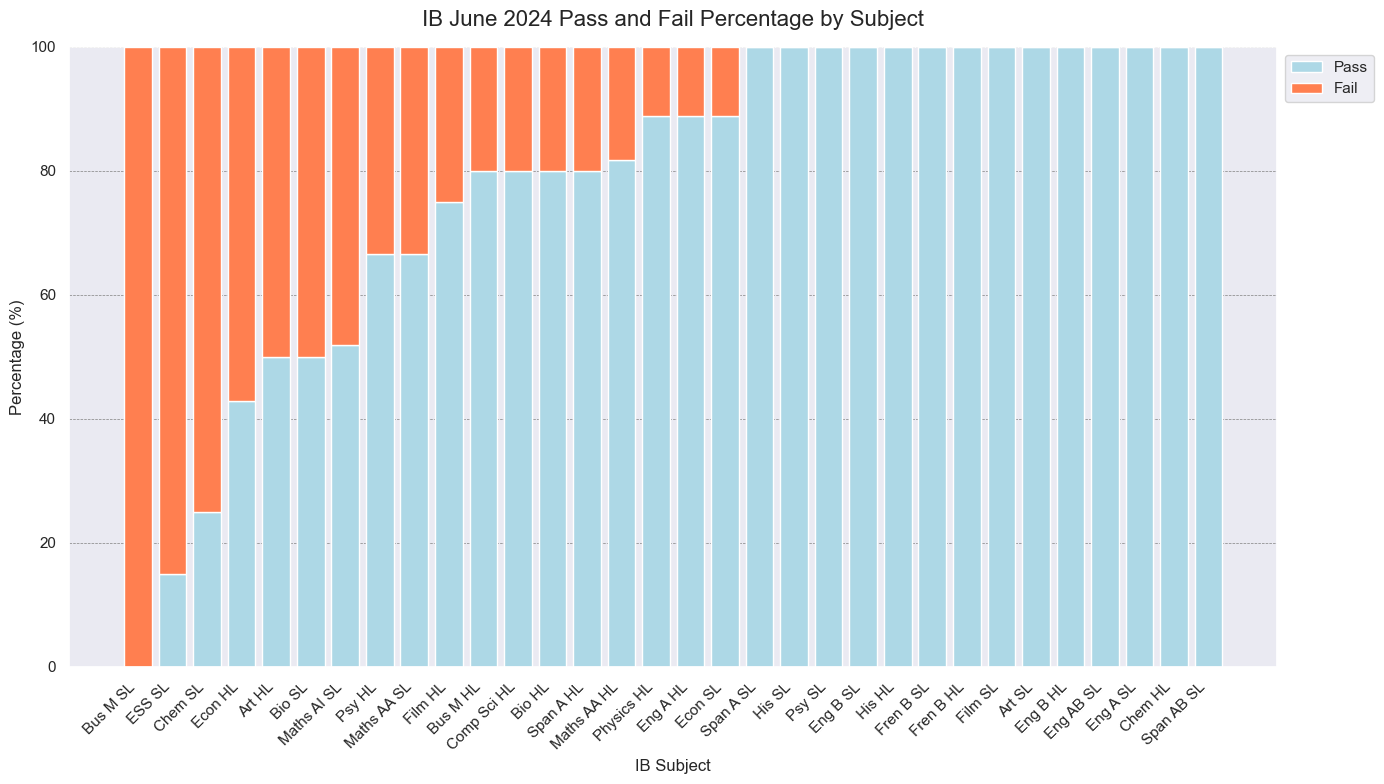

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'output_files/ib_2024_pass_fail_analysis.csv'
data = pd.read_csv(file_path)

# Sorting the data by Fail Percentage
data_sorted_by_fails = data.sort_values('Fail Percentage', ascending=False)

# Plotting the stacked bar chart using matplotlib with seaborn aesthetics
plt.figure(figsize=(14, 8))
sns.set(style="darkgrid")

# Creating the first bar (for Pass Percentage)
plt.bar(data_sorted_by_fails['Subject'], data_sorted_by_fails['Pass Percentage'], label='Pass', color='lightblue')

# Creating the second bar (for Fail Percentage), stacked on top of the Pass Percentage
plt.bar(data_sorted_by_fails['Subject'], data_sorted_by_fails['Fail Percentage'], 
        bottom=data_sorted_by_fails['Pass Percentage'], label='Fail', color='coral')

# Adding labels and title
plt.xlabel('IB Subject')
plt.ylabel('Percentage (%)')
plt.title('IB June 2024 Pass and Fail Percentage by Subject', pad=15, fontsize=16)
plt.xticks(rotation=45, ha='right')

# Set dark grid style
plt.grid(color='gray', linestyle='--', linewidth=0.5)

# Add a legend outside the plot
plt.legend(bbox_to_anchor=(1, 1))

# Display the chart
plt.tight_layout()
plt.show()

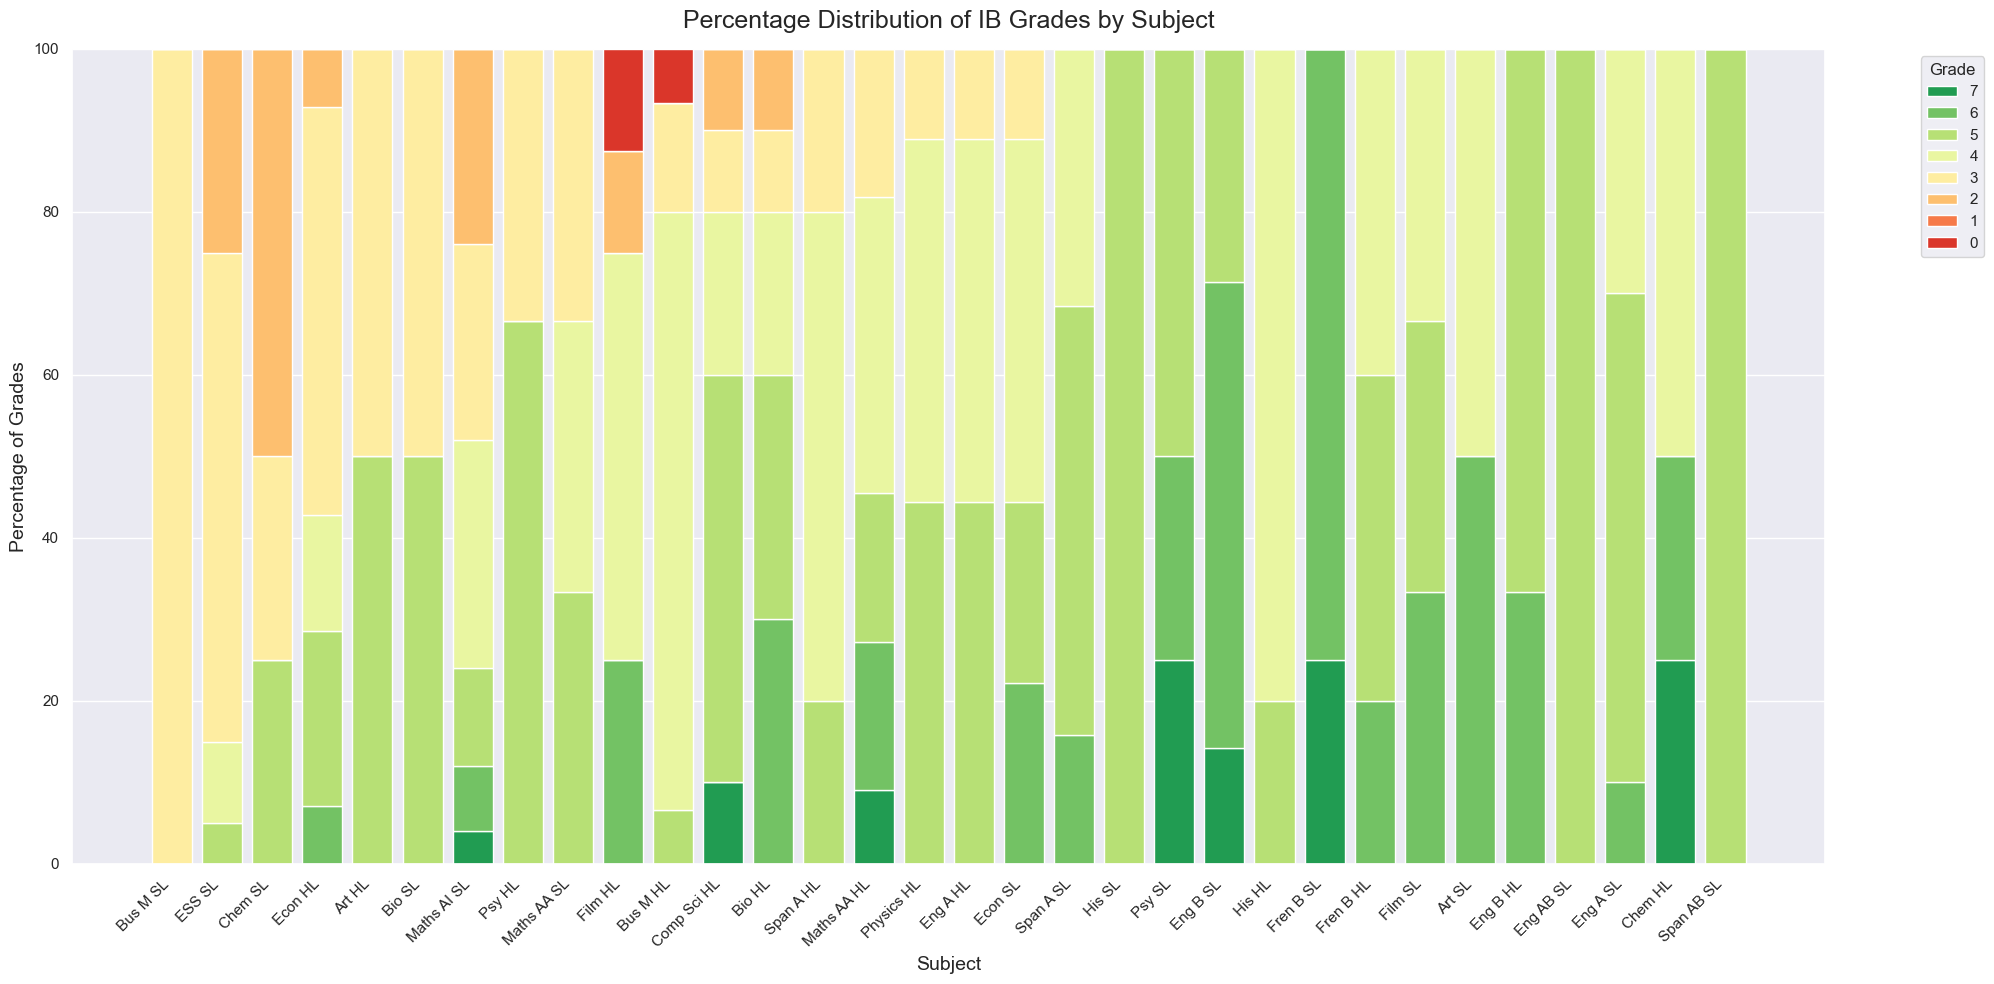

In [42]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Load the fail percentage data
fail_data_path = 'output_files/ib_2024_pass_fail_analysis.csv'
fail_data = pd.read_csv(fail_data_path)

# Sort the subjects by Fail Percentage in descending order
sorted_subjects = fail_data.sort_values('Fail Percentage', ascending=False)['Subject']

# Load the cleaned grade data
file_path = 'input_files/ib_results_for_analysis.csv'
new_data = pd.read_csv(file_path)

# Define the grade order from 7 to 0
grade_order = [7, 6, 5, 4, 3, 2, 1, 0]

# Calculate the count of each grade within each subject
new_subject_grade_counts = new_data.groupby(['Subject', 'Achieved']).size().unstack().fillna(0)

# Reindex to include all grades from 7 to 0, filling in missing grades with 0
new_subject_grade_counts = new_subject_grade_counts.reindex(columns=grade_order, fill_value=0)

# Calculate the percentage of each grade within each subject
subject_grade_percentages = new_subject_grade_counts.div(new_subject_grade_counts.sum(axis=1), axis=0) * 100

# Reordering the index (subjects) based on the sorted fail percentages
subject_grade_percentages = subject_grade_percentages.loc[sorted_subjects]

subject_grade_percentages = subject_grade_percentages[grade_order]

# Reordering the index (subjects) based on the sorted fail percentages
subject_grade_percentages = subject_grade_percentages.loc[sorted_subjects]
# Choosing a less intense color palette
palette = sns.color_palette("RdYlGn_r", 8) 

# Plotting with Matplotlib using Seaborn's style
plt.figure(figsize=(20, 10))
bottom_val = None

# Initialize bottom_val as an array of zeros with the same length as the index of your DataFrame
bottom_val = np.zeros(len(subject_grade_percentages.index))



# Iterate through each grade level to stack the bars
for grade in subject_grade_percentages.columns:
    plt.bar(subject_grade_percentages.index, 
            subject_grade_percentages[grade], 
            bottom=bottom_val, 
            label=grade, 
            color=palette[grade_order.index(grade)])
    
    # Update bottom_val by adding the current grade level values
    bottom_val += subject_grade_percentages[grade].values

# Adding labels, title, and legend
plt.xlabel('Subject', fontsize=14)
plt.ylabel('Percentage of Grades', fontsize=14)
plt.title('Percentage Distribution of IB Grades by Subject', fontsize=18, pad=15)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Grade', bbox_to_anchor=(1.05, 1), loc='upper left')

# Display the stacked bar chart
plt.tight_layout()
plt.show()


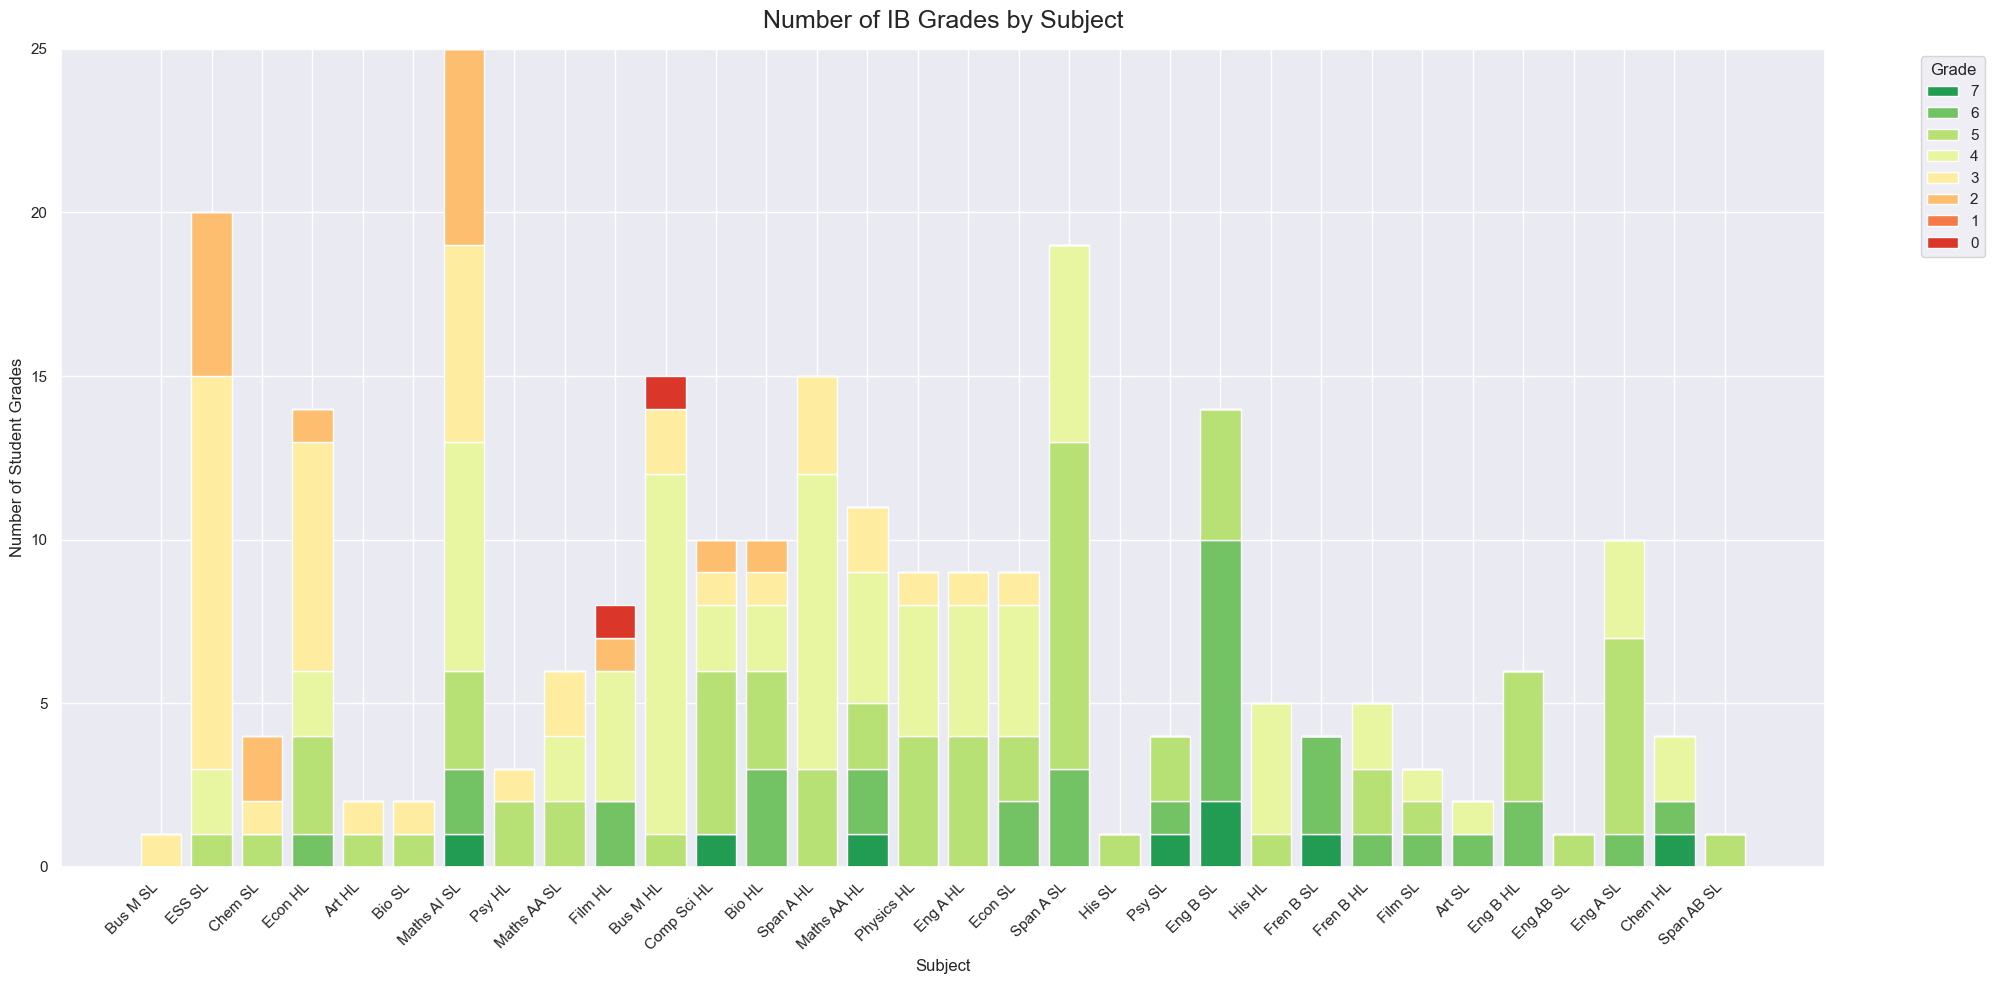

In [43]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Load the fail percentage data
fail_data_path = 'output_files/ib_2024_pass_fail_analysis.csv'
fail_data = pd.read_csv(fail_data_path)

# Sort the subjects by Fail Percentage in descending order
sorted_subjects = fail_data.sort_values('Fail Percentage', ascending=False)['Subject']

# Load the cleaned grade data
file_path = 'input_files/ib_results_for_analysis.csv'
new_data = pd.read_csv(file_path)

# Define the grade order from 7 to 0
grade_order = [7, 6, 5, 4, 3, 2, 1, 0]

# Calculate the count of each grade within each subject
new_subject_grade_counts = new_data.groupby(['Subject', 'Achieved']).size().unstack().fillna(0)

# Reindex to include all grades from 7 to 0, filling in missing grades with 0
new_subject_grade_counts = new_subject_grade_counts.reindex(columns=grade_order, fill_value=0)

# Reordering the index (subjects) based on the sorted fail percentages
new_subject_grade_counts = new_subject_grade_counts.loc[sorted_subjects]

# Choosing a green to red color palette by reversing 'RdYlGn'
palette = sns.color_palette("RdYlGn_r", len(grade_order))  # Green to red gradient

# Plotting with the new color palette
plt.figure(figsize=(20, 10))

# Initialize bottom_val as an array of zeros with the same length as the index of your DataFrame
bottom_val = np.zeros(len(new_subject_grade_counts.index))

# Iterate through each grade level to stack the bars
for grade in new_subject_grade_counts.columns:
    plt.bar(new_subject_grade_counts.index, 
            new_subject_grade_counts[grade], 
            bottom=bottom_val, 
            label=grade, 
            color=palette[grade_order.index(grade)])
    
    # Update bottom_val by adding the current grade level values
    bottom_val += new_subject_grade_counts[grade].values

plt.xlabel('Subject')
plt.ylabel('Number of Student Grades')
plt.title('Number of IB Grades by Subject', fontsize=18, pad=15)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Grade', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()